In [9]:
import pymysql
#连接数据库
db = pymysql.connect(host="rm-uf6ua72q394fq6v9q9o.mysql.rds.aliyuncs.com",port=3306,user="data_analyse",password="et_data_analyse",database="ccnu_main_test",charset="utf8")
#使用cursor()方法创建一个游标对象
cursor = db.cursor()
#cursor=pymysql.cursors.DictCursor

sql='''
select scan_num,max_enroll_number,current_enroll_number
from et_activity
where max_enroll_number >0
and
date(enroll_start_time) between '2019-09-01' and '2019-12-02';
'''
cursor.execute(sql)
data = cursor.fetchall()
print(data)
db.rollback()

#关闭游标和数据库的连接
cursor.close()
db.close()


((4495, 350, 350), (529, 128, 105), (356, 100, 55), (2403, 520, 520), (745, 32, 32), (434, 150, 111), (4760, 380, 378), (274, 200, 30), (5, 70, 53), (57, 400, 329), (25, 120, 80), (2, 50, 4), (43, 200, 116), (307, 60, 58), (2168, 104, 104), (694, 120, 57), (3438, 150, 133), (5140, 420, 396), (1642, 400, 216), (1459, 90, 88), (1841, 90, 89), (1725, 90, 87), (1431, 300, 210), (428, 43, 28), (1957, 310, 304), (1540, 200, 118), (1677, 200, 149), (1254, 50, 21), (171, 22, 16), (1064, 260, 216), (598, 20, 13), (2252, 150, 149), (756, 40, 14), (1665, 150, 149), (1466, 140, 139), (1426, 140, 140), (511, 190, 110), (4036, 500, 312), (868, 260, 217), (1330, 60, 60), (1421, 500, 179), (5614, 400, 397), (372, 200, 101), (1810, 50, 24), (2015, 300, 56), (3501, 180, 156), (1778, 140, 134), (1213, 120, 59), (569, 60, 16), (1590, 180, 178), (570, 120, 31), (1415, 200, 68), (1068, 160, 83), (527, 60, 24), (944, 320, 320), (33, 30, 22), (1050, 400, 199), (1044, 50, 42), (2, 100, 5), (511, 300, 180), (10

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
#折线图和柱形图

#获取最大报名数量和当前报名数量
acti_scan=[]
acti_max=[]
acti_cur=[]
acti_proportion=[]#报录比列表
for scan in data: 
    acti_scan.append(scan[0])
for max in data:
    acti_max.append(max[1])
for cur in data:
    acti_cur.append(cur[2])

#计算报录比
for one in data:
    act=one[2]/one[1]
    acti_proportion.append(act)
#创建dataframe
dic={'报录比':acti_proportion,'浏览量':acti_scan}
df=pd.DataFrame(dic)

x=df[['浏览量']]
y=df[['报录比']]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)



linreg=linear_model.LinearRegression()
linreg.fit(x_train,y_train)
print(linreg.intercept_)#截距
print(linreg.coef_)#回归系数


linreg.score(x_test,y_test)

[0.58666926]
[[9.56240305e-05]]


-0.015134685379103674

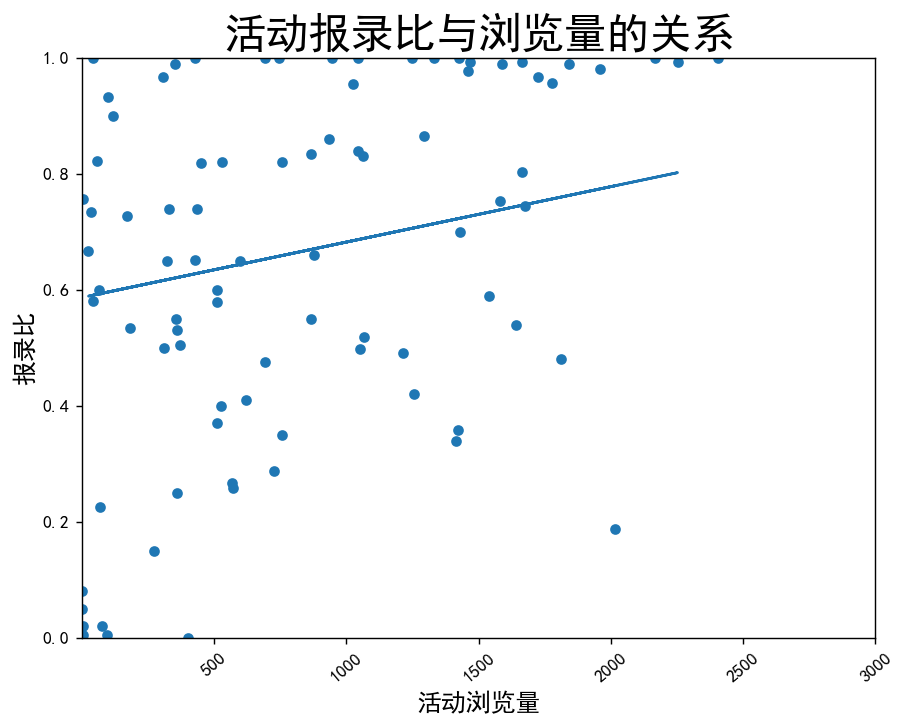

In [6]:
fig=plt.figure(dpi=128,figsize=(8,6))

plt.title("活动报录比与浏览量的关系",fontsize=24)
plt.xlabel("活动浏览量",fontsize=14)#设置轴的名称
plt.ylabel("报录比",fontsize=14)
plt.ylim(0,1)#设置y值界限
plt.xlim(0,3000)
plt.xticks(rotation=40)# x轴标签竖直
plt.xticks([500,1000,1500,2000,2500,3000])
#plt.yticks([0.3,0.5,0.6,0.7,0.8,0.9,1.0])

plt.scatter(acti_scan,acti_proportion,linewidths=0.01)

y=linreg.predict(x_test)
plt.plot(x_test,y)

plt.show()

In [ ]:
[1 if each > p else 0 for each in ratio]